# GeoPandas

In [6]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import geoplot as gplt

%matplotlib inline

In [3]:
DATA = Path("../data/")

In [8]:
colleges = pd.read_csv(DATA / 'processed' / 'colleges_in_US.csv')

In [9]:
colleges.head()

,UnitID,Institution Name,FIPS state,Sector,Size,Institution (entity) name,Address,City,State abbreviation,FIPS county,County name,Longitude,Latitude,Undergraduate enrollment,Graduate enrollment,Students receiving a PhD,Students receiving a MA,Students receiving a BA,Students receiving an AA
0,177834,A T Still University of Health Sciences,29,PnP,"1,000 - 4,999",A T Still University of Health Sciences,800 W Jefferson,Kirksville,MO,29001,Adair County,-92.589183,40.193648,0.0,3723.0,763,283,0,0
1,222178,Abilene Christian University,48,PnP,"5,000 - 9,999",Abilene Christian University,NaN,Abilene,TX,48441,Taylor County,-99.709797,32.468943,3666.0,1479.0,3,256,743,3
2,138558,Abraham Baldwin Agricultural College,13,Public,"1,000 - 4,999",Abraham Baldwin Agricultural College,2802 Moore Hwy,Tifton,GA,13277,Tift County,-83.528281,31.481889,3394.0,0.0,0,0,206,389
3,488031,Abraham Lincoln University,6,PfP,"Under 1,000",Abraham Lincoln University,3530 Wilshire Boulevard Suite 1430,Los Angeles,CA,6037,Los Angeles County,-118.301362,34.061398,30.0,167.0,17,6,2,0
4,172866,Academy College,27,PfP,"Under 1,000",Academy College,1600 W. 82nd Street Suite 100,Bloomington,MN,27053,Hennepin County,-93.299809,44.855722,65.0,0.0,0,0,6,16


In [22]:
geo_colleges = gpd.GeoDataFrame(colleges, geometry = gpd.points_from_xy(colleges['Longitude'], colleges['Latitude']))

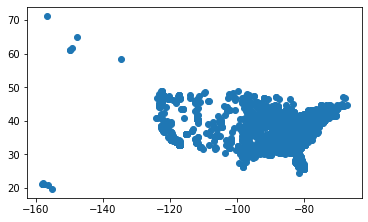

In [23]:
geo_colleges.plot();

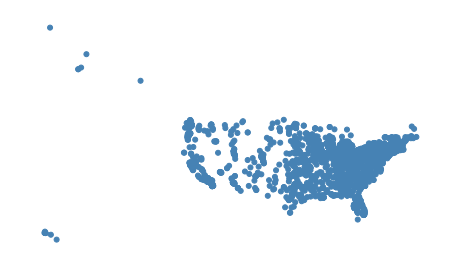

In [24]:
gplt.pointplot(geo_colleges);

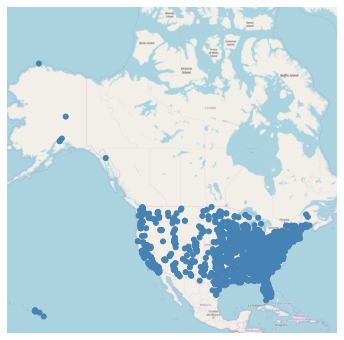

In [25]:
import geoplot.crs as gcrs

ax = gplt.webmap(geo_colleges, projection=gcrs.WebMercator())
gplt.pointplot(geo_colleges, ax=ax)

In [26]:
mask_lower48 = (geo_colleges['State abbreviation'] == 'HI') | (geo_colleges['State abbreviation'] == 'AK')

In [27]:
geo_colleges[mask_lower48].head()

,UnitID,Institution Name,FIPS state,Sector,Size,Institution (entity) name,Address,City,State abbreviation,FIPS county,County name,Longitude,Latitude,Undergraduate enrollment,Graduate enrollment,Students receiving a PhD,Students receiving a MA,Students receiving a BA,Students receiving an AA,geometry
22,102580,Alaska Bible College,2,PnP,"Under 1,000",Alaska Bible College,248 E Elmwood,Palmer,AK,2170,Matanuska-Susitna Borough,-149.111972,61.598553,42.0,0.0,0,0,3,1,POINT (-149.11197 61.59855)
23,102669,Alaska Pacific University,2,PnP,"Under 1,000",Alaska Pacific University,4101 University Dr,Anchorage,AK,2020,Anchorage Municipality,-149.804168,61.190968,296.0,213.0,3,49,59,4,POINT (-149.80417 61.19097)
105,366748,Argosy University-Hawaii,15,PfP,"Under 1,000",Argosy University-Hawaii,1001 Bishop Street Suite 400,Honolulu,HI,15003,Honolulu County,-157.860432,21.308906,389.0,490.0,55,100,98,15,POINT (-157.86043 21.30891)
300,230047,Brigham Young University-Hawaii,15,PnP,"1,000 - 4,999",Brigham Young University-Hawaii,55-220 Kulanui Street,Laie,HI,15003,Honolulu County,-157.926586,21.642074,3143.0,0.0,0,0,651,243,POINT (-157.92659 21.64207)
449,141486,Chaminade University of Honolulu,15,PnP,"1,000 - 4,999",Chaminade University of Honolulu,3140 Waialae Avenue,Honolulu,HI,15003,Honolulu County,-157.807851,21.289950,1810.0,579.0,0,249,367,53,POINT (-157.80785 21.28995)


In [28]:
geo_colleges[~mask_lower48].head()

,UnitID,Institution Name,FIPS state,Sector,Size,Institution (entity) name,Address,City,State abbreviation,FIPS county,County name,Longitude,Latitude,Undergraduate enrollment,Graduate enrollment,Students receiving a PhD,Students receiving a MA,Students receiving a BA,Students receiving an AA,geometry
0,177834,A T Still University of Health Sciences,29,PnP,"1,000 - 4,999",A T Still University of Health Sciences,800 W Jefferson,Kirksville,MO,29001,Adair County,-92.589183,40.193648,0.0,3723.0,763,283,0,0,POINT (-92.58918 40.19365)
1,222178,Abilene Christian University,48,PnP,"5,000 - 9,999",Abilene Christian University,NaN,Abilene,TX,48441,Taylor County,-99.709797,32.468943,3666.0,1479.0,3,256,743,3,POINT (-99.70980 32.46894)
2,138558,Abraham Baldwin Agricultural College,13,Public,"1,000 - 4,999",Abraham Baldwin Agricultural College,2802 Moore Hwy,Tifton,GA,13277,Tift County,-83.528281,31.481889,3394.0,0.0,0,0,206,389,POINT (-83.52828 31.48189)
3,488031,Abraham Lincoln University,6,PfP,"Under 1,000",Abraham Lincoln University,3530 Wilshire Boulevard Suite 1430,Los Angeles,CA,6037,Los Angeles County,-118.301362,34.061398,30.0,167.0,17,6,2,0,POINT (-118.30136 34.06140)
4,172866,Academy College,27,PfP,"Under 1,000",Academy College,1600 W. 82nd Street Suite 100,Bloomington,MN,27053,Hennepin County,-93.299809,44.855722,65.0,0.0,0,0,6,16,POINT (-93.29981 44.85572)


In [29]:
geo_colleges = geo_colleges[~mask_lower48].copy()

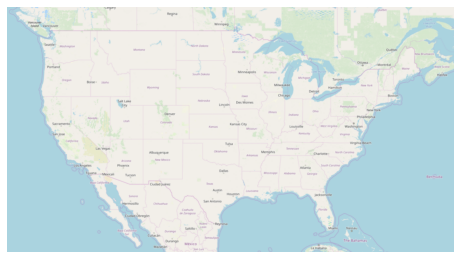

In [33]:
gplt.webmap(geo_colleges, projection = gcrs.WebMercator())

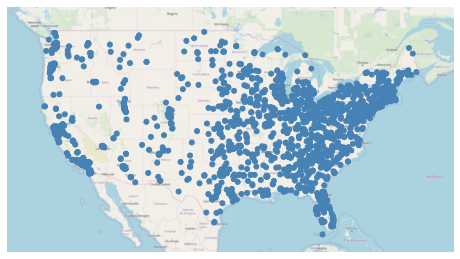

In [34]:
ax = gplt.webmap(geo_colleges, projection = gcrs.WebMercator())
gplt.pointplot(geo_colleges, ax = ax, )

In [35]:
VAR_OF_INTEREST = 'Undergraduate enrollment'

/anaconda3/envs/nacis/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/anaconda3/envs/nacis/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


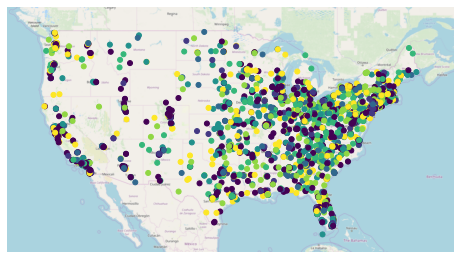

In [42]:
ax = gplt.webmap(geo_colleges, projection = gcrs.WebMercator())
gplt.pointplot(geo_colleges, ax = ax, hue = VAR_OF_INTEREST, k = 8,);

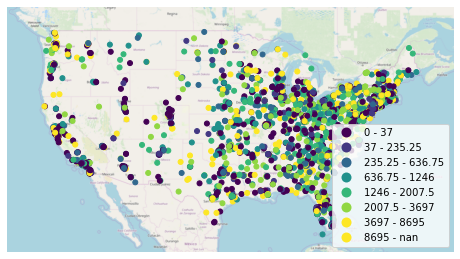

In [43]:
ax = gplt.webmap(geo_colleges, projection = gcrs.WebMercator())
gplt.pointplot(geo_colleges, ax = ax, hue = VAR_OF_INTEREST, k = 8, legend = True);

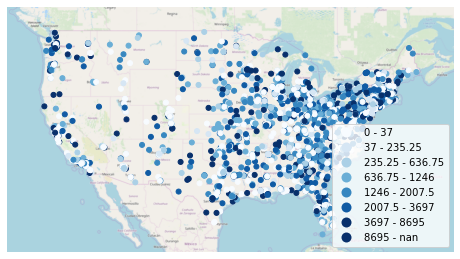

In [44]:
ax = gplt.webmap(geo_colleges, projection = gcrs.WebMercator())
gplt.pointplot(geo_colleges, ax = ax, hue = VAR_OF_INTEREST, k = 8, legend = True, cmap = 'Blues');

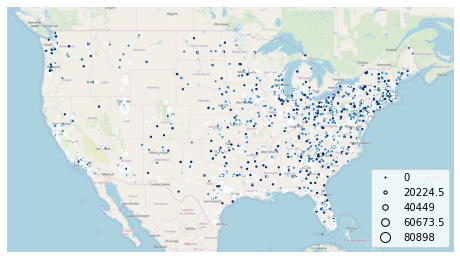

In [47]:
ax = gplt.webmap(geo_colleges, projection = gcrs.WebMercator())
gplt.pointplot(geo_colleges, ax = ax, hue = VAR_OF_INTEREST, k = 5, legend = True, cmap = 'Blues', scale = VAR_OF_INTEREST, legend_var = 'scale', limits = (1, 10));